In [10]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [11]:
file_ch0 = "rad_source/output-TR_0_0.h5"
f_ch0 = h5py.File( file_ch0, 'r')
print ( f_ch0.keys() )


<KeysViewHDF5 ['Metadata', 'Waveform']>


In [12]:
dset_ch0 = f_ch0['Waveform']
dset_metadata_ch0 = f_ch0['Metadata']
print( dset_metadata_ch0 )
print ( dset_ch0 )

<HDF5 dataset "Metadata": shape (1737, 2), type "<f4">
<HDF5 dataset "Waveform": shape (1737, 1024), type "<f4">


In [13]:
df_ch0 = pd.DataFrame( columns=('Event','Channel','Waveform') )
df_ch0['Event']   = dset_metadata_ch0[:,0]
df_ch0['Channel'] = dset_metadata_ch0[:,1]
for i in range( dset_ch0.shape[0] ):
    df_ch0[ 'Waveform' ].iloc[ i ] = dset_ch0[ i ]
df_ch0 = df_ch0.set_index( 'Event' )
df_ch0

C:\Users\anton\AppData\Local\Temp\ipykernel_54300\431503520.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_ch0[ 'Waveform' ].iloc[ i ] = dset_ch0[ i ]
C:\Users\anton\AppData\Local\Temp\ipykernel_54300\431503520.py:5: SettingWithCopyW

,Channel,Waveform
Event,,
20.0,-1.0,"[2211.0, 2210.9963, 2208.0054, 2209.9956, 2208..."
21.0,8.0,"[2207.0, 2207.0, 2207.0, 2206.9832, 2203.0198,..."
22.0,8.0,"[2205.0, 2205.0, 2203.0078, 2207.9731, 2207.00..."
23.0,8.0,"[2211.0, 2211.0, 2210.0, 2209.9954, 2206.002, ..."
24.0,8.0,"[2208.0, 2208.0, 2208.0264, 2209.9812, 2209.0,..."
...,...,...
1752.0,8.0,"[2213.0, 2213.0, 2213.9849, 2213.0237, 2214.93..."
1753.0,8.0,"[2212.0, 2212.0037, 2212.9866, 2211.0203, 2212..."
1754.0,8.0,"[2212.0, 2211.9988, 2210.9973, 2210.0088, 2211..."


In [14]:
f_ch0.close()

[2209.     2209.001  2210.     ... 2210.994  2213.9883 2214.    ]
[-1.8278809  -1.8269043  -0.82788086 ...  0.16601562  3.1604004
  3.1721191 ]


(0.0, 200.0)

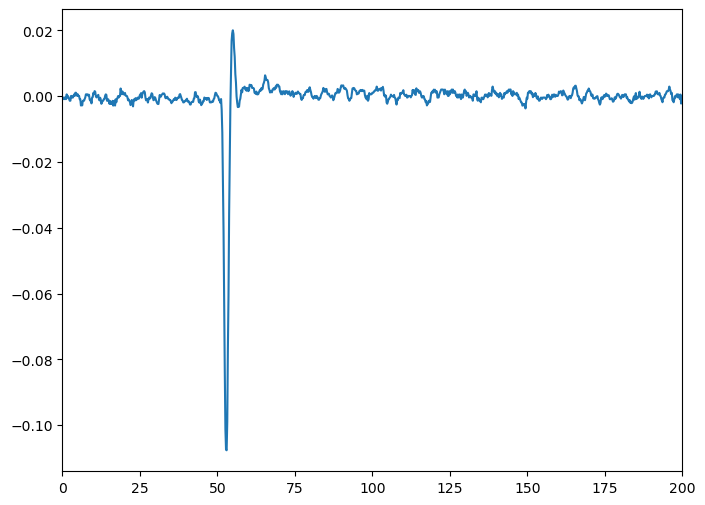

In [15]:
conv_X = 0.2 # ns
conv_Y = (2/4096)

i_evt = 20

event_ch0 = df_ch0.iloc[ i_evt ][ 'Waveform' ]
print ( event_ch0 )

baseline_ch0 = np.mean( event_ch0[800:] )
event_ch0_corr = event_ch0 - baseline_ch0
print ( event_ch0_corr )

fig = plt.figure( figsize=(8,6) )
X = conv_X * np.arange( 1024 ) 
plt.plot( X, ( event_ch0_corr * conv_Y ) )
# plt.xlim(0,1000)
plt.xlim(0,200)

(0.0, 200.0)

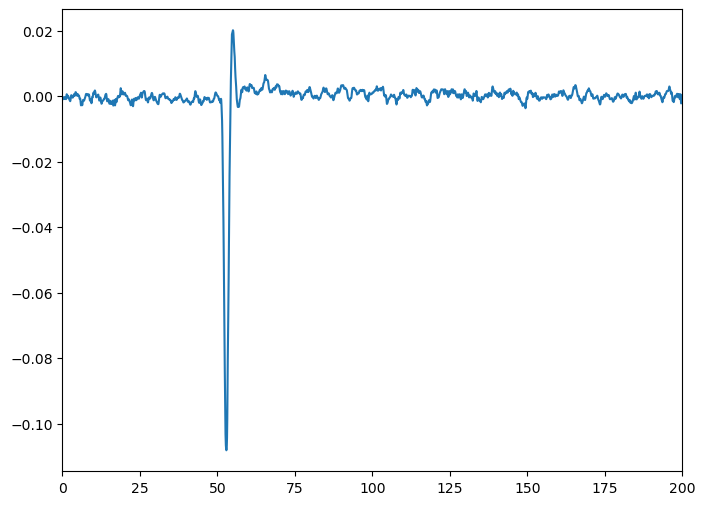

In [16]:
from scipy import interpolate

X_inter = np.linspace( X[0], X[1023], 50*len(X) )

f_ch0 = interpolate.interp1d(X, event_ch0_corr, 'cubic')
y_inter_ch0 = f_ch0( X_inter )

fig = plt.figure( figsize=(8,6) )
plt.plot( X_inter, ( y_inter_ch0 * conv_Y ) )
# plt.xlim(0,1000)
plt.xlim(0,200)

In [17]:
run_interpolation = True

max_vals_ch0 = []

X_inter = None
if run_interpolation:
    X_inter = np.linspace( X[0], X[1023], 50*len(X) )

for i_evt_ in df_ch0.index:
    event_ch0_ = df_ch0.loc[i_evt_, 'Waveform']
    
    baseline_ch0_ = np.mean( event_ch0_[800:])
    event_ch0_corr_ = ( event_ch0_  - baseline_ch0_ )

    max_ch0_ = None
    if run_interpolation:
        f_ch0_ = interpolate.interp1d(X, event_ch0_corr_, 'cubic')
        y_inter_ch0_ = f_ch0_( X_inter )
        
        max_ch0_ = np.max( -event_ch0_corr_ )
    else:
        max_ch0_ = np.max( -event_ch0_corr_ )
         
    max_vals_ch0.append( max_ch0_ )
    
max_vals_ch0 = np.array( max_vals_ch0 )

print ( max_vals_ch0, len(max_vals_ch0) )

[331.70837 380.76636 847.8845  ... 211.59216 247.85266 318.64624] 1737


(array([  0.,   0.,   0.,  11., 167., 248., 281., 251., 211., 147., 131.,
         79.,  72.,  38.,  24.,  24.,  16.,  17.,   8.,   5.,   2.,   3.,
          0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([0.        , 0.024     , 0.048     , 0.072     , 0.096     ,
        0.12      , 0.14399999, 0.168     , 0.192     , 0.21600001,
        0.23999999, 0.264     , 0.28799999, 0.31200001, 0.336     ,
        0.36000001, 0.384     , 0.40799999, 0.43200001, 0.456     ,
        0.47999999, 0.50400001, 0.528     , 0.55199999, 0.57599998,
        0.60000002, 0.62400001, 0.648     , 0.67199999, 0.69599998,
        0.72000003, 0.74400002, 0.76800001, 0.792     , 0.81599998,
        0.83999997, 0.86400002, 0.88800001, 0.912     , 0.93599999,
        0.95999998, 0.98400003, 1.00800002, 1.03199995, 1.05599999,
        1.08000004, 1.10399997, 1.12800002, 1.

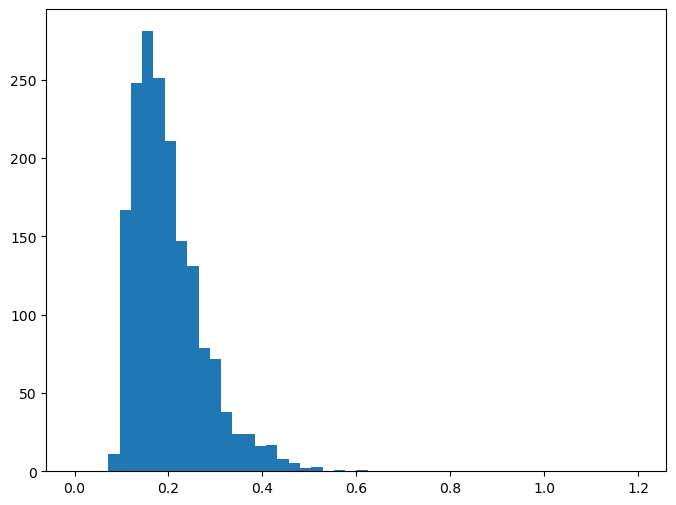

In [18]:
fig = plt.figure( figsize=(8,6) )
plt.hist( ( max_vals_ch0 * conv_Y ), bins=50, range=(0.,1.2) )
# plt.yscale( 'log' )